In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mdtraj as md
import openpathsampling as paths
from octomore import Unimore, Src, Abl
import glob
import pandas as pd
#from single_trajectory_analysis import subtrajectory_indices

In [2]:
# if Unimore is a superclass that has some CV associated, then with no CV it is less, rather than more
less = Unimore(kinase=Src)

In [3]:
# just a convenience function
# we use mdtraj to load the trajectory, then we convert it to an OPS trajectory
def ops_load_trajectory(filename):
    return paths.trajectory_from_mdtraj(md.load(filename))

In [4]:
# default directory: assumes you have hal:/cbio mounted at localhost:/cbio
dir11400="/cbio/jclab/projects/fah/fah-data/munged2/no-solvent/11400/"
# in practice, I found it better to scp the files to a local directory (especially for development/testing)
dir11400="local_11400/"
run_num=24
files = glob.glob(dir11400+"run"+str(run_num)+"*.h5")
print len(files)

20


In [5]:
%%time
# make a dictionary mapping the filename to a list of DFG angles at each snapshot
dfg_angle_trajectories = {
    f : less.dfg(ops_load_trajectory(f)) 
    for f in files
}

CPU times: user 12.4 s, sys: 1.04 s, total: 13.4 s
Wall time: 25 s


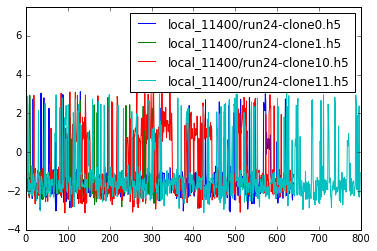

In [6]:
# checking files 4 at a time, for readability
for f in files[0:4]:
    plt.plot(dfg_angle_trajectories[f], label=f)
plt.ylim(-4, 7.5)
plt.legend()

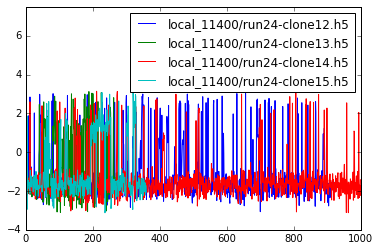

In [7]:
for f in files[4:8]:
    plt.plot(dfg_angle_trajectories[f], label=f)
plt.ylim(-4, 7.5)
plt.legend()

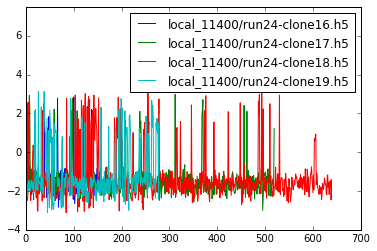

In [8]:
for f in files[8:12]:
    plt.plot(dfg_angle_trajectories[f], label=f)
plt.ylim(-4, 7.5)
plt.legend()

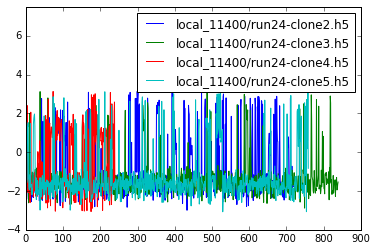

In [9]:
for f in files[12:16]:
    plt.plot(dfg_angle_trajectories[f], label=f)
plt.ylim(-4, 7.5)
plt.legend()

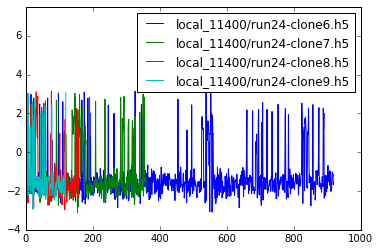

In [10]:
for f in files[16:20]:
    plt.plot(dfg_angle_trajectories[f], label=f)
plt.ylim(-4, 7.5)
plt.legend()

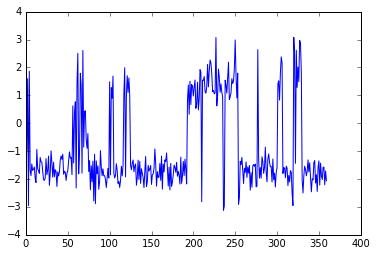

In [11]:
favorite = 'local_11400/run24-clone15.h5'
plt.plot(dfg_angle_trajectories[favorite])

In [12]:
traj = ops_load_trajectory(favorite)

In [13]:
n_frames_in = sum([less.DFG_in(s) for s in traj])
n_frames_out = sum([less.DFG_out(s) for s in traj])
n_frames = len(traj)
print "DFG in:  " + str(n_frames_in) + "/" + str(n_frames)
print "DFG out: " + str(n_frames_out) + "/" + str(n_frames)

DFG in:  75/360
DFG out: 188/360


In [14]:
# this will come easier with the `tps` branch
tps_transition = paths.TPSTransition(less.DFG_out, less.DFG_in)
tps_ensemble = tps_transition.ensembles[0]

In [15]:
transition_trajs = tps_ensemble.split(traj)
print len(transition_trajs)

4


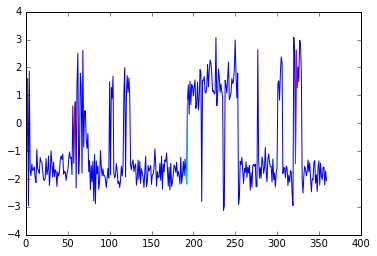

In [16]:
plt.plot(less.dfg(traj))
indices = traj.subtrajectory_indices(transition_trajs)
for (frames, loc_traj) in zip(indices, transition_trajs):
    plt.plot(frames, less.dfg(loc_traj))

In [17]:
analyzer = paths.SingleTrajectoryAnalysis(tps_transition)

In [18]:
analyzer.add_frames(traj)

In [19]:
analyzer.continuous_time_distribution(tps_transition.stateA)

array([ 1,  7,  7,  5,  1,  6, 10,  7,  1,  2,  1,  2,  1,  1,  1,  3,  5,
        3,  1,  5,  3,  1,  7,  2,  1,  3,  2,  4,  3,  1,  4,  1,  6,  1,
        1,  8,  1,  5,  4,  7,  1,  4,  8,  1,  5,  1,  1,  2,  6,  1,  2,
        1,  9,  1,  2,  1,  2,  2,  2,  1])